In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sas

In [3]:
data=pd.read_csv('Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
data1=data.rename(columns={'CustomerID':'CustomerID,','Gender':'Gender','Age':'Age','Annual Income (k$)':'Annual_Income',
                           'Spending Score (1-100)':'Spending_Score'})

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID,       200 non-null int64
Gender            200 non-null object
Age               200 non-null int64
Annual_Income     200 non-null int64
Spending_Score    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
data1.head()

,"CustomerID,",Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
data1.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

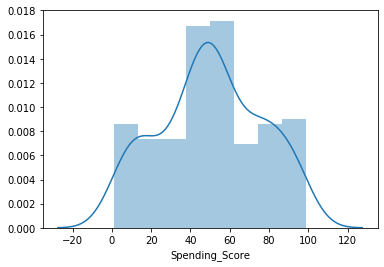

In [13]:
sas.distplot(data1.Spending_Score)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D86F787B8>,
      dtype=object)

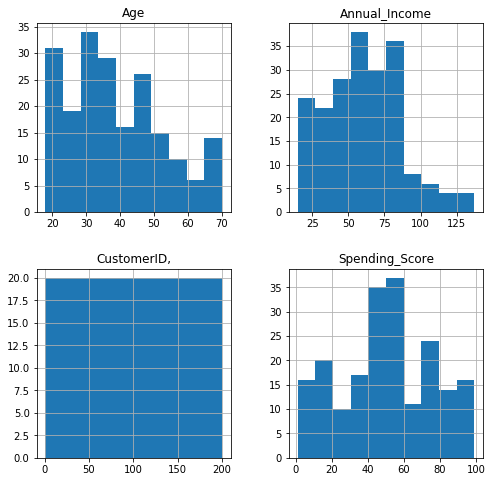

In [14]:
data1.hist(figsize=(8,8))

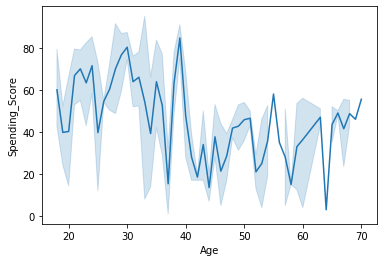

In [15]:
sas.lineplot(data1['Age'],data1['Spending_Score'])

Text(0.5, 1.0, 'Age/Spending_Score')

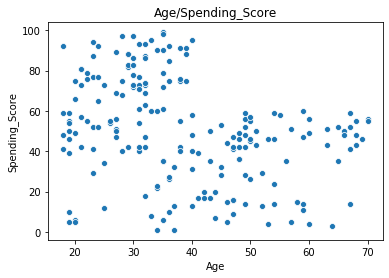

In [16]:
sas.scatterplot(x=data1.Age,y=data1.Spending_Score)
plt.title('Age/Spending_Score')

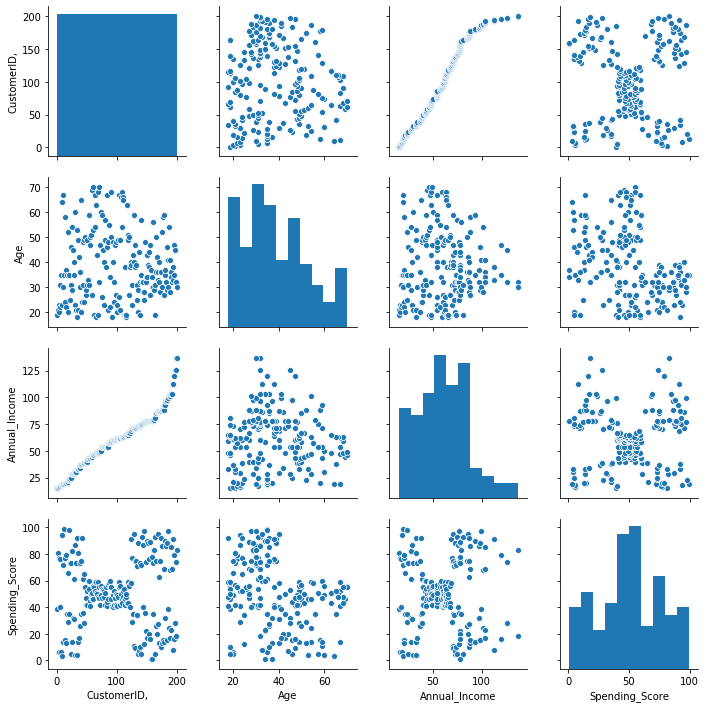

In [17]:
sas.pairplot(data1)

In [18]:
data1.corr()

,"CustomerID,",Age,Annual_Income,Spending_Score
"CustomerID,",1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual_Income,0.977548,-0.012398,1.000000,0.009903
Spending_Score,0.013835,-0.327227,0.009903,1.000000


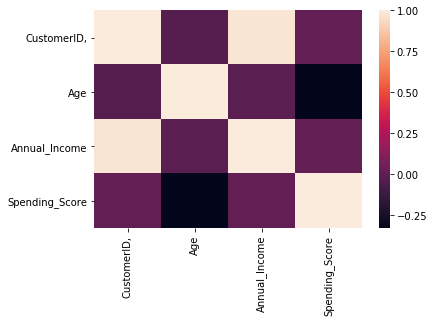

In [19]:
hm=data1.corr()
sas.heatmap(hm)

In [20]:
data1.describe()

,"CustomerID,",Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
data1.isnull().sum()

CustomerID,       0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [22]:
data1.shape

(200, 5)

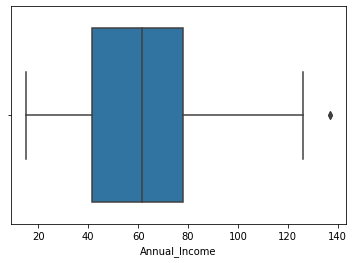

In [23]:
sas.boxplot(data1.Annual_Income)

In [24]:
perc99=data1.Annual_Income.quantile(0.99)
perc99

126.1099999999999

In [25]:
data1.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

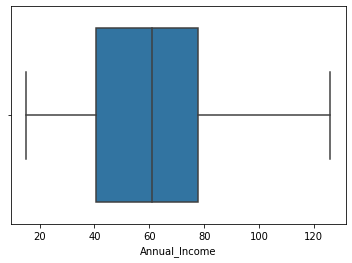

In [26]:
data1=data1[data1.Annual_Income<=perc99]
sas.boxplot(data1.Annual_Income)

In [27]:
data1.head()

,"CustomerID,",Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
data1.Spending_Score.value_counts()

42    8
55    7
73    6
46    6
75    5
48    5
35    5
59    5
50    5
52    5
14    4
47    4
5     4
41    4
40    4
56    4
60    3
43    3
49    3
51    3
77    3
88    3
92    3
13    3
15    3
17    3
54    3
4     2
6     2
10    2
     ..
61    2
58    2
9     1
85    1
8     1
7     1
11    1
12    1
94    1
89    1
3     1
53    1
27    1
22    1
68    1
98    1
63    1
65    1
66    1
45    1
44    1
71    1
23    1
78    1
34    1
31    1
82    1
83    1
24    1
99    1
Name: Spending_Score, Length: 83, dtype: int64

In [29]:
data1.shape

(198, 5)

In [30]:
data1.columns

Index(['CustomerID,', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [31]:
data1.Gender.value_counts()

Female    112
Male       86
Name: Gender, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
data1.Gender=(le.fit_transform(data1.Gender))

C:\Users\91859\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [34]:
data1.head()

,"CustomerID,",Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [35]:
data1['Spending_Score'].value_counts()

42    8
55    7
73    6
46    6
75    5
48    5
35    5
59    5
50    5
52    5
14    4
47    4
5     4
41    4
40    4
56    4
60    3
43    3
49    3
51    3
77    3
88    3
92    3
13    3
15    3
17    3
54    3
4     2
6     2
10    2
     ..
61    2
58    2
9     1
85    1
8     1
7     1
11    1
12    1
94    1
89    1
3     1
53    1
27    1
22    1
68    1
98    1
63    1
65    1
66    1
45    1
44    1
71    1
23    1
78    1
34    1
31    1
82    1
83    1
24    1
99    1
Name: Spending_Score, Length: 83, dtype: int64

In [36]:
x=data1.drop('Spending_Score',axis=1)

In [37]:
y=data1['Spending_Score']

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc=StandardScaler()

In [40]:
x=sc.fit_transform(x)

In [41]:
x

array([[-1.72332506,  1.1411948 , -1.42541358, -1.77917141],
       [-1.70582937,  1.1411948 , -1.2823665 , -1.77917141],
       [-1.68833368, -0.87627458, -1.35389004, -1.73944701],
       [-1.670838  , -0.87627458, -1.13931942, -1.73944701],
       [-1.65334231, -0.87627458, -0.5671311 , -1.69972262],
       [-1.63584663, -0.87627458, -1.21084296, -1.69972262],
       [-1.61835094, -0.87627458, -0.28103694, -1.65999822],
       [-1.60085525, -0.87627458, -1.13931942, -1.65999822],
       [-1.58335957,  1.1411948 ,  1.79314572, -1.62027383],
       [-1.56586388, -0.87627458, -0.63865464, -1.62027383],
       [-1.5483682 ,  1.1411948 ,  2.00771635, -1.62027383],
       [-1.53087251, -0.87627458, -0.28103694, -1.62027383],
       [-1.51337683, -0.87627458,  1.36400448, -1.58054943],
       [-1.49588114, -0.87627458, -1.06779588, -1.58054943],
       [-1.47838545,  1.1411948 , -0.13798986, -1.58054943],
       [-1.46088977,  1.1411948 , -1.21084296, -1.58054943],
       [-1.44339408, -0.

In [42]:
new_data=data1.iloc[:,:-1]

In [43]:
new_data.head()

,"CustomerID,",Gender,Age,Annual_Income
0,1,1,19,15
1,2,1,21,15
2,3,0,20,16
3,4,0,23,16
4,5,0,31,17


In [44]:
new_data.shape

(198, 4)

In [45]:
from sklearn.cluster import KMeans

In [46]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(new_data)
    wcss.append(kmeans.inertia_)

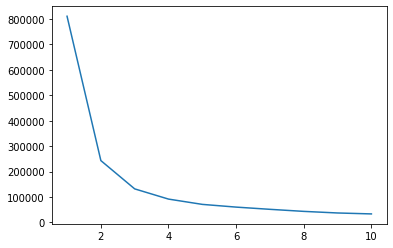

In [47]:
plt.plot(range(1,11),wcss)

In [48]:
km_model=KMeans(n_clusters=3,init='k-means++',random_state=0)
ykmeans=km_model.fit_predict(new_data)
ykmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [49]:
new_data.head()

,"CustomerID,",Gender,Age,Annual_Income
0,1,1,19,15
1,2,1,21,15
2,3,0,20,16
3,4,0,23,16
4,5,0,31,17


In [50]:
new_data['target']=pd.Series(ykmeans)

In [51]:
new_data.head()

,"CustomerID,",Gender,Age,Annual_Income,target
0,1,1,19,15,1
1,2,1,21,15,1
2,3,0,20,16,1
3,4,0,23,16,1
4,5,0,31,17,1


In [52]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 5 columns):
CustomerID,      198 non-null int64
Gender           198 non-null int32
Age              198 non-null int64
Annual_Income    198 non-null int64
target           198 non-null int32
dtypes: int32(2), int64(3)
memory usage: 7.7 KB


In [53]:
new_data['target'].unique()

array([1, 2, 0], dtype=int64)

In [54]:
new_data.target.value_counts()

2    70
0    67
1    61
Name: target, dtype: int64

In [55]:
x=data1.drop('Spending_Score',axis=1)

In [56]:
y=data1['Spending_Score']

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
sc=StandardScaler()

In [59]:
x=sc.fit_transform(x)

In [60]:
x

array([[-1.72332506,  1.1411948 , -1.42541358, -1.77917141],
       [-1.70582937,  1.1411948 , -1.2823665 , -1.77917141],
       [-1.68833368, -0.87627458, -1.35389004, -1.73944701],
       [-1.670838  , -0.87627458, -1.13931942, -1.73944701],
       [-1.65334231, -0.87627458, -0.5671311 , -1.69972262],
       [-1.63584663, -0.87627458, -1.21084296, -1.69972262],
       [-1.61835094, -0.87627458, -0.28103694, -1.65999822],
       [-1.60085525, -0.87627458, -1.13931942, -1.65999822],
       [-1.58335957,  1.1411948 ,  1.79314572, -1.62027383],
       [-1.56586388, -0.87627458, -0.63865464, -1.62027383],
       [-1.5483682 ,  1.1411948 ,  2.00771635, -1.62027383],
       [-1.53087251, -0.87627458, -0.28103694, -1.62027383],
       [-1.51337683, -0.87627458,  1.36400448, -1.58054943],
       [-1.49588114, -0.87627458, -1.06779588, -1.58054943],
       [-1.47838545,  1.1411948 , -0.13798986, -1.58054943],
       [-1.46088977,  1.1411948 , -1.21084296, -1.58054943],
       [-1.44339408, -0.

In [61]:
y

0      39
1      81
2       6
3      77
4      40
5      76
6       6
7      94
8       3
9      72
10     14
11     99
12     15
13     77
14     13
15     79
16     35
17     66
18     29
19     98
20     35
21     73
22      5
23     73
24     14
25     82
26     32
27     61
28     31
29     87
       ..
168    27
169    63
170    13
171    75
172    10
173    92
174    13
175    86
176    15
177    69
178    14
179    90
180    32
181    86
182    15
183    88
184    39
185    97
186    24
187    68
188    17
189    85
190    23
191    69
192     8
193    91
194    16
195    79
196    28
197    74
Name: Spending_Score, Length: 198, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [65]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [66]:
pred=knn.predict(x_test)

In [67]:
pred

array([ 4, 22, 45, 73, 42, 42, 77,  5, 14,  1, 41, 55, 73, 42, 41, 77, 55,
        5, 42,  1, 11, 22, 42, 40,  5, 29, 63, 23, 46, 14,  6, 34, 16, 42,
       14, 17, 75,  6, 42, 75], dtype=int64)

In [68]:
y_test

18     29
168    27
63     59
175    86
71     42
86     58
5      76
118    43
12     15
150    17
60     56
75     54
163    93
96     47
113    46
7      94
33     92
134     5
37     73
166    20
109    48
143    87
45     65
157    78
138    10
111    54
177    69
183    88
92     49
44     28
16     35
135    88
136     7
97     50
22      5
194    16
126    35
4      40
66     50
123    91
Name: Spending_Score, dtype: int64

In [69]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [70]:
accuracy_score(y_test,pred)

0.05

In [71]:
pred1=knn.predict(x_test)

In [72]:
accuracy_score(y_test,pred1)

0.05

In [73]:
confusion_matrix(y_test,pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [74]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.33      0.50      0.40         2
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         0
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          34       0.00    

C:\Users\91859\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91859\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
